<a href="https://colab.research.google.com/github/Raquel223/Ciclo-Diurno-Relampagos/blob/main/IC_Gr%C3%A1fico_por_dia_BrasilDAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evolução da ocorrência de relâmpagos IC durante os dias do mês**
---
- **OBJETIVO:** Observar qual a variação temporal dos relâmpagos ao longo dos dias dos mês para determinado tipo de relâmpago. Nessa caso IC.

---

**Dados utilizados**: Os dados de relâmpagos foram obtidos da rede BrasilDAT, através da campanha CHUVA-Vale do Paraíba. Neste exemplo foram utilizados dados do mês de dezembro.

---

- **METODOLOGIA:** Nessa aula realizaremos os seguintes procedimentos:

    1.   **Importação** das biblotecas
    2.   Montagem do **drive online**
    3.   **Abrir** o arquivo 
    4.   **Formatação** do dataframe
    5.   **Transformar** UTC para hora local
    6.   **Organização** do dataframe
    7.   **Plotagem** da figura
    
---

**OBSERVAÇÕES IMPORTANTES**: 
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive 

---
- **Realizado por:** Raquel Gonçalves Pereira e Enrique V. Mattos - 25/08/2021

# **Exemplo da figura que será gerada**

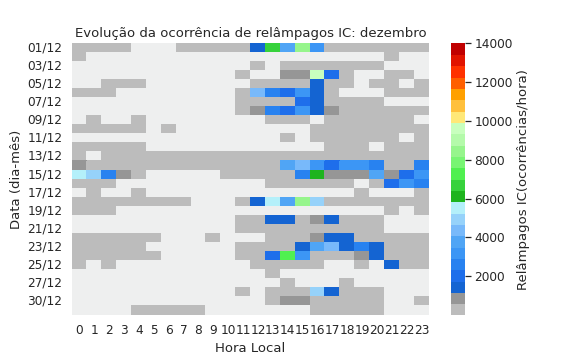

# **Importação das bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import  tarfile
import matplotlib
import os

# **Montagem do drive online**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **### >>> MUDANÇAS AQUI <<< ###**:
- Insira o **caminho + nome** do arquivo

In [ ]:
filename = '/content/drive/MyDrive/GitHub/BrasilDAT/Novo_Dezembro.csv'

dir = os.path.dirname(filename)

# **Abrindo o arquivo csv (filtro de 100 km)**

In [ ]:
df = pd.read_csv(filename)
df
#index_col=0 para tirar o unnamed 

,Unnamed: 0,tipo,ano,mes,dia,hor,pc(A),lat,lon,distancia
0,291,IC,2011,12,1,0,2.0,-23.831063,-47.362767,80.176647
1,393,IC,2011,12,1,0,-3.6,-23.747681,-47.299678,70.926538
2,427,IC,2011,12,1,0,-3.0,-23.680954,-47.207217,59.820518
3,464,IC,2011,12,1,0,2.2,-23.660856,-47.214331,60.030432
4,730,IC,2011,12,1,0,-2.0,-23.883682,-47.379116,84.102026
...,...,...,...,...,...,...,...,...,...,...
241258,3565780,IC,2011,12,31,23,11.4,-23.180063,-47.192800,69.840121
241259,3568857,IC,2011,12,31,23,2.4,-23.360032,-45.774964,90.710722
241260,3568858,IC,2011,12,31,23,1.4,-23.373971,-45.744405,93.414592
241261,3568859,IC,2011,12,31,23,-2.3,-23.365797,-45.753093,92.742952


**Dentro da coluna 'tipo', só será utilizado os relâmpagos 'IC'**

In [ ]:
#nesse exemplo pegamos IC, mas lembrando que pode também ser feito com os +CG e -CG
IC = df[df['tipo'] == 'IC' ]
IC

,Unnamed: 0,tipo,ano,mes,dia,hor,pc(A),lat,lon,distancia
0,291,IC,2011,12,1,0,2.0,-23.831063,-47.362767,80.176647
1,393,IC,2011,12,1,0,-3.6,-23.747681,-47.299678,70.926538
2,427,IC,2011,12,1,0,-3.0,-23.680954,-47.207217,59.820518
3,464,IC,2011,12,1,0,2.2,-23.660856,-47.214331,60.030432
4,730,IC,2011,12,1,0,-2.0,-23.883682,-47.379116,84.102026
...,...,...,...,...,...,...,...,...,...,...
241258,3565780,IC,2011,12,31,23,11.4,-23.180063,-47.192800,69.840121
241259,3568857,IC,2011,12,31,23,2.4,-23.360032,-45.774964,90.710722
241260,3568858,IC,2011,12,31,23,1.4,-23.373971,-45.744405,93.414592
241261,3568859,IC,2011,12,31,23,-2.3,-23.365797,-45.753093,92.742952


# **Formatando o dataframe**

##**Formatando a data**

In [ ]:
#Criando uma coluna nova chamada 'diames' (dd/mm/ano), para juntar a coluna 'dia', 'mes' e 'ano
IC['diames']=IC.apply(lambda x:'%s/%s/%s' % (x['dia'],x['mes'],x['ano']),axis=1)
IC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,tipo,ano,mes,dia,hor,pc(A),lat,lon,distancia,diames
0,291,IC,2011,12,1,0,2.0,-23.831063,-47.362767,80.176647,1/12/2011
1,393,IC,2011,12,1,0,-3.6,-23.747681,-47.299678,70.926538,1/12/2011
2,427,IC,2011,12,1,0,-3.0,-23.680954,-47.207217,59.820518,1/12/2011
3,464,IC,2011,12,1,0,2.2,-23.660856,-47.214331,60.030432,1/12/2011
4,730,IC,2011,12,1,0,-2.0,-23.883682,-47.379116,84.102026,1/12/2011
...,...,...,...,...,...,...,...,...,...,...,...
241258,3565780,IC,2011,12,31,23,11.4,-23.180063,-47.192800,69.840121,31/12/2011
241259,3568857,IC,2011,12,31,23,2.4,-23.360032,-45.774964,90.710722,31/12/2011
241260,3568858,IC,2011,12,31,23,1.4,-23.373971,-45.744405,93.414592,31/12/2011
241261,3568859,IC,2011,12,31,23,-2.3,-23.365797,-45.753093,92.742952,31/12/2011


In [ ]:
# Formata a data para o padrao datetime do pandas
IC['diames'] = pd.to_datetime(IC['diames']).dt.strftime('%d/%m/%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Adiciona uma columa com o dia-mês ao qual os dados pertencem
IC['diames'] = pd.to_datetime(IC['diames']).dt.strftime('%d/%m')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
IC

,Unnamed: 0,tipo,ano,mes,dia,hor,pc(A),lat,lon,distancia,diames
0,291,IC,2011,12,1,0,2.0,-23.831063,-47.362767,80.176647,01/12
1,393,IC,2011,12,1,0,-3.6,-23.747681,-47.299678,70.926538,01/12
2,427,IC,2011,12,1,0,-3.0,-23.680954,-47.207217,59.820518,01/12
3,464,IC,2011,12,1,0,2.2,-23.660856,-47.214331,60.030432,01/12
4,730,IC,2011,12,1,0,-2.0,-23.883682,-47.379116,84.102026,01/12
...,...,...,...,...,...,...,...,...,...,...,...
241258,3565780,IC,2011,12,31,23,11.4,-23.180063,-47.192800,69.840121,31/12
241259,3568857,IC,2011,12,31,23,2.4,-23.360032,-45.774964,90.710722,31/12
241260,3568858,IC,2011,12,31,23,1.4,-23.373971,-45.744405,93.414592,31/12
241261,3568859,IC,2011,12,31,23,-2.3,-23.365797,-45.753093,92.742952,31/12


##**Formatando a quantidade**

In [ ]:
#criar uma coluna quantidade com valor 1
IC_ = IC.assign(quantidade=1)
IC_

,Unnamed: 0,tipo,ano,mes,dia,hor,pc(A),lat,lon,distancia,diames,quantidade
0,291,IC,2011,12,1,0,2.0,-23.831063,-47.362767,80.176647,01/12,1
1,393,IC,2011,12,1,0,-3.6,-23.747681,-47.299678,70.926538,01/12,1
2,427,IC,2011,12,1,0,-3.0,-23.680954,-47.207217,59.820518,01/12,1
3,464,IC,2011,12,1,0,2.2,-23.660856,-47.214331,60.030432,01/12,1
4,730,IC,2011,12,1,0,-2.0,-23.883682,-47.379116,84.102026,01/12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241258,3565780,IC,2011,12,31,23,11.4,-23.180063,-47.192800,69.840121,31/12,1
241259,3568857,IC,2011,12,31,23,2.4,-23.360032,-45.774964,90.710722,31/12,1
241260,3568858,IC,2011,12,31,23,1.4,-23.373971,-45.744405,93.414592,31/12,1
241261,3568859,IC,2011,12,31,23,-2.3,-23.365797,-45.753093,92.742952,31/12,1


In [ ]:
#filtrei somente as colunas que irei usar
final = IC_[['hor','diames','quantidade']]
final

,hor,diames,quantidade
0,0,01/12,1
1,0,01/12,1
2,0,01/12,1
3,0,01/12,1
4,0,01/12,1
...,...,...,...
241258,23,31/12,1
241259,23,31/12,1
241260,23,31/12,1
241261,23,31/12,1


# **Transformar de UTC para hora local**

In [ ]:
final['hor']= final['hor'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],[21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hor,diames,quantidade
0,21,01/12,1
1,21,01/12,1
2,21,01/12,1
3,21,01/12,1
4,21,01/12,1
...,...,...,...
241258,20,31/12,1
241259,20,31/12,1
241260,20,31/12,1
241261,20,31/12,1


# **Organizando o dataframe**

In [ ]:
result = final.pivot_table(index='diames', columns='hor', values='quantidade', aggfunc=np.sum, fill_value=0)
result

hor,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
diames,,,,,,,,,,,,,,,,,,,,,
01/12,6,2,8,3,0,0,0,3,30,93,...,3682,8705,3418,378,252,130,59,68,25,2
02/12,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,47,0,0
03/12,0,0,0,0,0,0,0,0,0,0,...,288,6,1,5,4,1,3,0,0,0
04/12,0,0,0,0,0,0,0,0,0,0,...,865,1060,9415,2216,14,0,0,5,1,0
05/12,0,0,1,1,2,0,0,0,0,0,...,161,488,1573,42,45,0,9,1,0,1
06/12,20,5,1,0,0,0,0,0,0,0,...,2088,3341,1247,25,0,0,0,8,8,13
07/12,0,0,0,0,0,0,0,0,0,0,...,285,2265,1217,500,172,75,71,0,0,0
08/12,0,0,0,0,0,0,0,0,0,0,...,2138,3067,1495,897,356,42,16,4,1,1
09/12,0,4,0,0,7,0,0,0,0,0,...,3,11,0,1,2,11,79,8,23,0


# **Plotagem da figura**

In [ ]:
# Define o estilo do grafico ({darkgrid, whitegrid, dark, white, ticks})
sns.set(style="dark", font_scale=1.1)

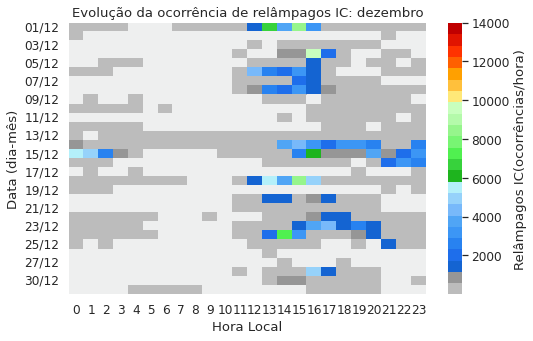

In [ ]:
fig = plt.figure(figsize=(8,5))


# Criando uma paleta de cores personalizada 
# Referência da paleta: http://wxmaps.org/pix/temp8
# Para descobrir os valores das cores: https://imagecolorpicker.com/
colors = ["#bcbcbc","#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_under('#eeefef')  #os valores 0 (abaixo do vmin) estão ficando na cor cinza bem clarinho

plot = sns.heatmap(result,cmap=cmap, vmin=1, vmax=14000,cbar_kws={'label': 'Relâmpagos IC(ocorrências/hora)'})

plt.xticks(rotation=0)

plt.xlabel('Hora Local')
plt.ylabel('Data (dia-mês)')
plot.set_title('Evolução da ocorrência de relâmpagos IC: dezembro')
plt.savefig(f'{dir}/IC_Gráfico_por_dia_BrasilDAT.png', format='png')